<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/Lewandowski/Rekomendacje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
df = pd.read_csv('GroceryStoreDataSet.csv', names=["products"])
df.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,products
0,"MILK,BREAD,BISCUIT"
1,"BREAD,MILK,BISCUIT,CORNFLAKES"
2,"BREAD,TEA,BOURNVITA"
3,"JAM,MAGGI,BREAD,MILK"
4,"MAGGI,TEA,BISCUIT"
5,"BREAD,TEA,BOURNVITA"
6,"MAGGI,TEA,CORNFLAKES"
7,"MAGGI,BREAD,TEA,BISCUIT"
8,"JAM,MAGGI,BREAD,TEA"
9,"BREAD,MILK"


In [13]:
structured_df = df['products'].apply(lambda x: x.split(','))
structured_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0                [MILK, BREAD, BISCUIT]
1    [BREAD, MILK, BISCUIT, CORNFLAKES]
2               [BREAD, TEA, BOURNVITA]
3             [JAM, MAGGI, BREAD, MILK]
4                 [MAGGI, TEA, BISCUIT]
Name: products, dtype: object

In [14]:
unique_items_set = set([item for sublist in structured_df for item in sublist])
sorted(unique_items_set)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['BISCUIT',
 'BOURNVITA',
 'BREAD',
 'COCK',
 'COFFEE',
 'CORNFLAKES',
 'JAM',
 'MAGGI',
 'MILK',
 'SUGER',
 'TEA']

In [15]:
df['products'] = df['products'].str.replace('COCK', 'COKE').str.replace('SUGER', 'SUGAR')
structured_data = df['products'].apply(lambda x: x.split(','))
structured_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0                [MILK, BREAD, BISCUIT]
1    [BREAD, MILK, BISCUIT, CORNFLAKES]
2               [BREAD, TEA, BOURNVITA]
3             [JAM, MAGGI, BREAD, MILK]
4                 [MAGGI, TEA, BISCUIT]
Name: products, dtype: object

In [16]:
transaction_encoder = TransactionEncoder()
encoded_dataset = transaction_encoder.fit(structured_data).transform(structured_data)
encoded_dataset = pd.DataFrame(encoded_dataset, columns=transaction_encoder.columns_).astype(int)
encoded_dataset

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,BISCUIT,BOURNVITA,BREAD,COFFEE,COKE,CORNFLAKES,JAM,MAGGI,MILK,SUGAR,TEA
0,1,0,1,0,0,0,0,0,1,0,0
1,1,0,1,0,0,1,0,0,1,0,0
2,0,1,1,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,1,1,1,0,0
4,1,0,0,0,0,0,0,1,0,0,1
5,0,1,1,0,0,0,0,0,0,0,1
6,0,0,0,0,0,1,0,1,0,0,1
7,1,0,1,0,0,0,0,1,0,0,1
8,0,0,1,0,0,0,1,1,0,0,1
9,0,0,1,0,0,0,0,0,1,0,0


# **Zadanie 1**

In [17]:
frequent_itemsets = apriori(encoded_dataset, min_support=0.15, use_colnames=True)
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.35,(BISCUIT)
1,0.20,(BOURNVITA)
2,0.65,(BREAD)
3,0.40,(COFFEE)
4,0.15,(COKE)
5,0.30,(CORNFLAKES)
6,0.25,(MAGGI)
7,0.25,(MILK)
8,0.30,(SUGAR)
9,0.35,(TEA)


In [18]:
# Znalezienie reguł asocjacyjnych na podstawie miary 'confidence' i minimalnego progu 0.1
assoc_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

# Wybór reguły o najwyższej wartości 'confidence'
top_confidence_rule = assoc_rules.loc[assoc_rules['confidence'].idxmax()]

# Wyświetlenie wybranej reguły
top_confidence_rule

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
17,(COKE),(COFFEE),0.15,0.4,0.15,1.0,2.5,0.09,inf,0.705882


In [65]:
# Generowanie reguł asocjacyjnych na podstawie miary 'lift' z minimalnym progiem 0.1
association_rules_lift = association_rules(frequent_itemsets, metric="lift", min_threshold=0.1)

# Znalezienie reguły z najwyższym 'lift'
highest_lift_rule = association_rules_lift.loc[association_rules_lift['lift'].idxmax()]

# Wyświetlenie reguły o najwyższym 'lift'
highest_lift_rule


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


antecedents             (COKE)
consequents           (COFFEE)
antecedent support        0.15
consequent support         0.4
support                   0.15
confidence                 1.0
lift                       2.5
leverage                  0.09
conviction                 inf
zhangs_metric         0.705882
Name: 17, dtype: object

# **Filmy**

In [20]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
ratings = pd.read_csv('https://s3-us-west-2.amazonaws.com/recommender-tutorial/ratings.csv')
movies = pd.read_csv('https://s3-us-west-2.amazonaws.com/recommender-tutorial/movies.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
print("Missing values in ratings:\n", ratings.isnull().sum())

Missing values in ratings:
 userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
ratings.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [24]:
print("Missing values in movies:\n", movies.isnull().sum())

Missing values in movies:
 movieId    0
title      0
genres     0
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
movies.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [26]:
print("Ratings: ", ratings['rating'].nunique(), sorted(ratings['rating'].unique()))
ratings['rating'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Ratings:  10 [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


rating
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

In [66]:
# Wyświetlenie liczby ocen
total_ratings = ratings.shape[0]
print("Liczba ocen: ", total_ratings)

# Wyświetlenie liczby unikalnych filmów i tytułów
unique_movie_ids = movies['movieId'].nunique()
unique_titles = movies['title'].nunique()
print("Liczba filmów: ", unique_movie_ids, ", Unikalne tytuły: ", unique_titles)

# Wyświetlenie liczby ocenionych filmów
reviewed_movies = unique_movie_ids
print("Liczba ocenionych filmów: ", reviewed_movies)

# Wyświetlenie liczby unikalnych użytkowników oraz najwyższego identyfikatora użytkownika
unique_users = ratings['userId'].nunique()
max_user_id = ratings['userId'].max()
print("Liczba użytkowników: ", unique_users, ", Najwyższy ID: ", max_user_id)

# Obliczenie i wyświetlenie średniej liczby ocen na użytkownika
avg_ratings_per_user = round(total_ratings / unique_users, 2)
print("Średnia liczba ocen na użytkownika: ", avg_ratings_per_user)

# Obliczenie i wyświetlenie średniej liczby ocen na film
avg_ratings_per_movie = round(total_ratings / unique_movie_ids, 2)
print("Średnia liczba ocen na film: ", avg_ratings_per_movie)


Liczba ocen:  100836
Liczba filmów:  9742 , Unikalne tytuły:  9737
Liczba ocenionych filmów:  9742
Liczba użytkowników:  610 , Najwyższy ID:  610
Średnia liczba ocen na użytkownika:  165.3
Średnia liczba ocen na film:  10.35


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [67]:
# Pobranie listy tytułów filmów
titles_list = movies['title'].tolist()

# Znalezienie zduplikowanych tytułów filmów
duplicate_titles = {title for title in titles_list if titles_list.count(title) > 1}

# Wyświetlenie zduplikowanych tytułów filmów
print("Zduplikowane tytuły filmów:")
for title in duplicate_titles:
    print("  -", title)

# Filtracja i wyświetlenie filmów z zduplikowanymi tytułami
duplicated_movies = movies[movies['title'].isin(duplicate_titles)]
duplicated_movies

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Zduplikowane tytuły filmów:
  - Eros (2004)
  - Confessions of a Dangerous Mind (2002)
  - War of the Worlds (2005)
  - Emma (1996)
  - Saturn 3 (1980)


,movieId,title,genres,year
650,838,Emma (1996),comedy|drama|romance,1996
2141,2851,Saturn 3 (1980),adventure|sci-fi|thriller,1980
4169,6003,Confessions of a Dangerous Mind (2002),comedy|crime|drama|thriller,2002
5601,26958,Emma (1996),romance,1996
5854,32600,Eros (2004),drama,2004
5931,34048,War of the Worlds (2005),action|adventure|sci-fi|thriller,2005
6932,64997,War of the Worlds (2005),action|sci-fi,2005
9106,144606,Confessions of a Dangerous Mind (2002),comedy|crime|drama|romance|thriller,2002
9135,147002,Eros (2004),drama|romance,2004
9468,168358,Saturn 3 (1980),sci-fi|thriller,1980


In [29]:
movie_titles_dict = dict(zip(movies['movieId'], movies['title']))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [68]:
# Importowanie modułu pandas
import pandas as pd

# Ustalenie wartości dla średniej oceny (m) i liczby ocen (C)
mean_rating = ratings['rating'].mean()
total_ratings = ratings['rating'].count()

# Funkcja do obliczania średniej Bayesowskiej oceny
def bayesian_average(ratings):
    bayesian_avg = (total_ratings * mean_rating + ratings.sum()) / (total_ratings + ratings.count())
    return bayesian_avg

# Grupowanie po 'movieId' i zastosowanie funkcji bayesian_average
bayesian_avg_ratings = ratings.groupby('movieId')['rating'].agg(bayesian_average).reset_index()

# Zmiana nazw kolumn
bayesian_avg_ratings.columns = ['movieId', 'bayesian_avg']

# Połączenie danych o filmach z obliczonymi ocenami
movie_statistics = pd.merge(movies, bayesian_avg_ratings, on='movieId')

# Wyświetlenie kilku pierwszych wierszy
print(movie_statistics.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  year  bayesian_avg  
0  adventure|animation|children|comedy|fantasy  1995      3.502449  
1                   adventure|children|fantasy  1995      3.501481  
2                               comedy|romance  1995      3.501432  
3                         comedy|drama|romance  1995      3.501478  
4                                       comedy  1995      3.501348  


In [31]:
from scipy.sparse import csr_matrix
def create_sparse(df):
  M = df['userId'].nunique()
  N = df['movieId'].nunique()
  user_mapper = dict(zip(np.unique(df["userId"]), list(range(M))))
  movie_mapper = dict(zip(np.unique(df["movieId"]), list(range(N))))
  user_inv_mapper = dict(zip(list(range(M)), np.unique(df["userId"])))
  movie_inv_mapper = dict(zip(list(range(N)), np.unique(df["movieId"])))
  user_index = [user_mapper[i] for i in df['userId']]
  item_index = [movie_mapper[i] for i in df['movieId']]
  X = csr_matrix((df["rating"], (user_index, item_index)), shape=(M,N))
  return X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper = create_sparse(ratings)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [69]:
from scipy.sparse import csr_matrix
import numpy as np

def create_sparse_matrix(df):
    num_users = df['userId'].nunique()
    num_movies = df['movieId'].nunique()

    user_mapper = {user_id: idx for idx, user_id in enumerate(sorted(df['userId'].unique()))}
    movie_mapper = {movie_id: idx for idx, movie_id in enumerate(sorted(df['movieId'].unique()))}

    user_inv_mapper = {idx: user_id for user_id, idx in user_mapper.items()}
    movie_inv_mapper = {idx: movie_id for movie_id, idx in movie_mapper.items()}

    user_index = [user_mapper[user_id] for user_id in df['userId']]
    movie_index = [movie_mapper[movie_id] for movie_id in df['movieId']]

    sparse_matrix = csr_matrix((df["rating"], (user_index, movie_index)), shape=(num_users, num_movies))

    return sparse_matrix, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [75]:
def calculate_sparsity_info(matrix):
    n_total = matrix.shape[0] * matrix.shape[1]
    n_ratings = matrix.nnz  # liczba ocen, włącznie z ocenami 0
    sparsity = n_ratings / n_total
    sparsity_percentage = round(sparsity * 100, 2)
    n_ratings_per_user = matrix.getnnz(axis=1)
    return sparsity_percentage, n_ratings_per_user

sparsity_percentage, ratings_per_user = calculate_sparsity_info(X)
print(f"Rzadkość macierzy: {sparsity_percentage}%")

Rzadkość macierzy: 1.7%


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
n_ratings_per_user = X.getnnz(axis=1)
print("Amount of ratings per user:", n_ratings_per_user)

Amount of ratings per user: [ 232   29   39  216   44  314  152   47   46  140   64   32   31   48
  135   98  105  502  703  242  443  119  121  110   26   21  135  570
   81   34   50  102  156   86   23   60   21   78  100  103  217  440
  114   48  399   42  140   33   21  310  359  130   20   33   25   46
  476  112  107   22   39  366  271  517   34  345   36 1260   46   62
   35   45  210  177   69  119   29   61   64  167   26  227  118  293
   34   70   21   56  518   54  575   24   97   56  168   78   36   92
   53  148   61   56  377  273  722   33   34   76  127   51  646   65
  150   31  112   87  165   22  215   22   58  292   56   50  360   38
   22   33  140   28   69  347   35   35  279  111  141   22  194  608
  168   38   71  128   23   32   20   48   58   26   59   63  179   34
   46  398   21   26   97  437   39   38   23   36   65  190  173   94
  269   50   82   26   25   67   24   36  904   77   69   24  118  977
   57  134   47  226  258   48   20   66   85   2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [76]:
toy_story_id = movies[movies['title'].str.contains('Toy Story \(')]['movieId'].iloc[0]
similar_movies = find_similar_movies(toy_story_id, X, movie_mapper, movie_inv_mapper, k=10, metric='cosine')

print("Najbardziej podobne filmy (Id):")
print(f"{toy_story_id}: {similar_movies}")

print("\nNajbardziej podobne filmy (Tytuły):")
toy_story_title = movies[movies['movieId'] == toy_story_id]['title'].iloc[0]
similar_movies_titles = movies[movies['movieId'].isin(similar_movies)]['title']
print(f"{toy_story_title}: {similar_movies_titles.tolist()}")

Najbardziej podobne filmy (Id):
1: [3114, 480, 780, 260, 356, 364, 1210, 648, 1265]

Najbardziej podobne filmy (Tytuły):
Toy Story (1995): ['Star Wars: Episode IV - A New Hope (1977)', 'Forrest Gump (1994)', 'Lion King, The (1994)', 'Jurassic Park (1993)', 'Mission: Impossible (1996)', 'Independence Day (a.k.a. ID4) (1996)', 'Star Wars: Episode VI - Return of the Jedi (1983)', 'Groundhog Day (1993)', 'Toy Story 2 (1999)']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:1: DeprecationWarning: invalid escape sequence '\('
<>:1: DeprecationWarning: invalid escape sequence '\('
<ipython-input-76-b540035183b2>:1: DeprecationWarning: invalid escape sequence '\('
  toy_story_id = movies[movies['title'].str.contains('Toy Story \(')]['movieId'].iloc[0]


In [37]:
toy_story_id = movies[movies['title'].str.contains('Toy Story \(')]['movieId'][0]
toy_story_id

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:1: DeprecationWarning: invalid escape sequence '\('
<>:1: DeprecationWarning: invalid escape sequence '\('
<ipython-input-37-8df9906ce1cd>:1: DeprecationWarning: invalid escape sequence '\('
  toy_story_id = movies[movies['title'].str.contains('Toy Story \(')]['movieId'][0]


1

In [39]:
movies['genres'] = movies['genres'].str.lower()
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)', expand=False)
print(movies)

      movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                                           genres  year  
0     adventure|animation|children|comedy|fantasy  1995  
1                      adventure|children|fantasy  1995  
2                                  comedy|romance  1995  
3                            comedy|drama|roman

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [77]:
# Tworzenie listy gatunków filmowych
all_genres = []
for genres in movies['genres'].apply(lambda x: x.lower().split('|')):
    all_genres.extend(genres)

# Wyświetlenie zbioru unikalnych gatunków
unique_genres = set(all_genres)
print("Zbiór unikalnych gatunków (małymi literami):", unique_genres)

# Tworzenie ramki danych z gatunkami i ich licznością
genre_df = pd.DataFrame(all_genres, columns=['Genre'])
genre_counts = genre_df['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']
genre_counts

Zbiór unikalnych gatunków (małymi literami): {'thriller', 'imax', 'film-noir', 'western', 'crime', 'children', 'horror', 'adventure', 'animation', '(no genres listed)', 'sci-fi', 'war', 'romance', 'musical', 'action', 'documentary', 'mystery', 'drama', 'comedy', 'fantasy'}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Genre,Count
0,drama,4361
1,comedy,3756
2,thriller,1894
3,action,1828
4,romance,1596
5,adventure,1263
6,crime,1199
7,sci-fi,980
8,horror,978
9,fantasy,779


In [41]:
children_movies_count = movies[movies['genres'].str.contains('children')].shape[0]
print("Liczba filmów dla dzieci:", children_movies_count)

Liczba filmów dla dzieci: 664


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
from datetime import datetime
ratings['rating_year'] = pd.to_datetime(ratings['timestamp'], unit='s').dt.year

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1. Liczba filmów dla dzieci,
2. Rozkład ocen filmów z 1995 roku,
3. Średnia ocen

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Rozkład ocen filmów z 1995 roku:
rating
0.5      50
1.0     254
1.5      75
2.0     522
2.5     244
3.0    1701
3.5     467
4.0    1625
4.5     308
5.0     898
Name: count, dtype: int64


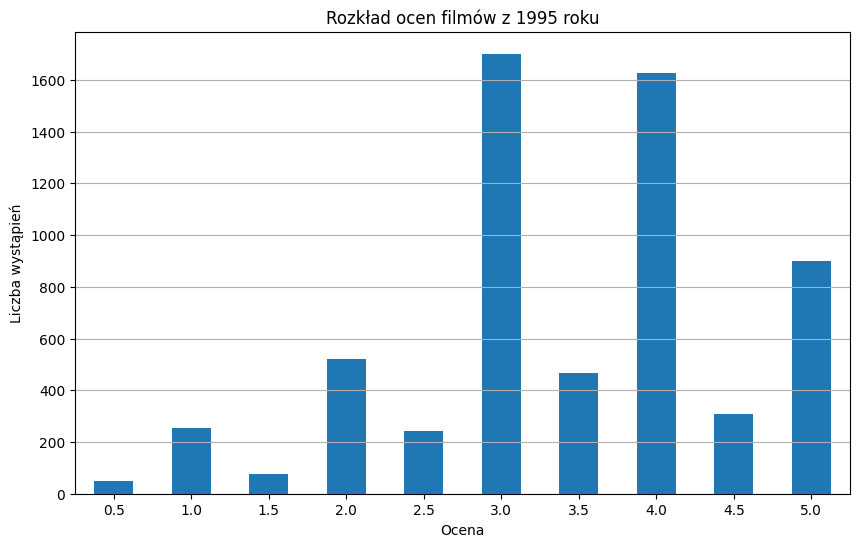

In [78]:
import matplotlib.pyplot as plt

# Łączenie ocen z danymi o filmach na podstawie identyfikatora filmu
ratings_join = pd.merge(ratings, movies, on='movieId', how='inner')

# Filtracja ocen dla filmów z roku 1995
ratings_1995 = ratings_join[ratings_join['year'] == '1995']

# Obliczenie rozkładu ocen dla filmów z roku 1995
ratings_distribution_1995 = ratings_1995['rating'].value_counts().sort_index()

print("Rozkład ocen filmów z 1995 roku:")
print(ratings_distribution_1995)

# Tworzenie wykresu
plt.figure(figsize=(10, 6))
ratings_distribution_1995.plot(kind='bar')
plt.title('Rozkład ocen filmów z 1995 roku')
plt.xlabel('Ocena')
plt.ylabel('Liczba wystąpień')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Wyświetlenie wykresu
plt.show()

In [44]:
ratings_join

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,userId,movieId,rating,timestamp,rating_year,title,genres,year
0,1,1,4.0,964982703,2000,Toy Story (1995),adventure|animation|children|comedy|fantasy,1995
1,5,1,4.0,847434962,1996,Toy Story (1995),adventure|animation|children|comedy|fantasy,1995
2,7,1,4.5,1106635946,2005,Toy Story (1995),adventure|animation|children|comedy|fantasy,1995
3,15,1,2.5,1510577970,2017,Toy Story (1995),adventure|animation|children|comedy|fantasy,1995
4,17,1,4.5,1305696483,2011,Toy Story (1995),adventure|animation|children|comedy|fantasy,1995
...,...,...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,2016,Bloodmoon (1997),action|thriller,1997
100832,610,160527,4.5,1479544998,2016,Sympathy for the Underdog (1971),action|crime|drama,1971
100833,610,160836,3.0,1493844794,2017,Hazard (2005),action|drama|thriller,2005
100834,610,163937,3.5,1493848789,2017,Blair Witch (2016),horror|thriller,2016


In [79]:
# Filtracja filmów akcji
action_movies = ratings_join[ratings_join['genres'].str.contains('action', case=False)]

# Obliczenie średniej oceny filmów akcji
average_rating_action = action_movies['rating'].mean()
print(f"Średnia ocen filmów akcji: {average_rating_action}")

print("\nTrzy najwyżej oceniane filmy akcji:")
# Grupowanie filmów akcji według tytułu i obliczenie średniej oceny, następnie sortowanie malejąco i wyświetlenie trzech najlepszych
top_three_action_movies = action_movies.groupby('title')['rating'].mean().sort_values(ascending=False).head(3)
print(top_three_action_movies)

Średnia ocen filmów akcji: 3.447984331646809

Trzy najwyżej oceniane filmy akcji:
title
Knock Off (1998)                                                      5.0
On the Other Side of the Tracks (De l'autre côté du périph) (2012)    5.0
Sonatine (Sonachine) (1993)                                           5.0
Name: rating, dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **Biblioteka Surprise**

In [48]:
!pip install surprise
# importing relevant libraries
from surprise.model_selection import cross_validate, GridSearchCV
from surprise.prediction_algorithms import SVD, KNNBasic, KNNBaseline
from surprise import Dataset
from surprise import Reader
from surprise import accuracy, Dataset, SVD
from surprise.model_selection import train_test_split

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [82]:
# Znalezienie minimalnej i maksymalnej oceny w danych
min_rating = ratings['rating'].min()
max_rating = ratings['rating'].max()

# Inicjalizacja czytnika
reader = Reader(rating_scale=(min_rating, max_rating))

# Tworzenie zbioru danych z ramki danych
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# Podział danych na zbiór treningowy i testowy
trainset, testset = train_test_split(data, test_size=0.25)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **Algorytm SVD**

In [54]:
import time
start_time_svd_train = time.time()
algo = SVD()
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)
end_time_svd_train = time.time()
print(f"Czas trenowania modelu SVD: {end_time_svd_train - start_time_svd_train} sekund")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RMSE: 0.8798
Czas trenowania modelu SVD: 3.7719178199768066 sekund


In [55]:
param_grid = {
    'n_factors': [1,2,5,10, 50]
}

start_time_svd = time.time()
gs_svd = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=5, n_jobs=-1)
gs_svd.fit(data)
end_time_svd = time.time()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [56]:
gs_svd.best_params

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'rmse': {'n_factors': 5}}

In [57]:
cross_validate(SVD(), data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8832  0.8723  0.8759  0.8662  0.8723  0.8740  0.0056  
MAE (testset)     0.6780  0.6695  0.6716  0.6674  0.6701  0.6713  0.0036  
Fit time          2.47    2.73    1.58    1.90    1.85    2.10    0.42    
Test time         0.14    0.12    0.13    0.29    0.13    0.16    0.06    


{'test_rmse': array([0.88322572, 0.87230907, 0.87590602, 0.86623352, 0.87231923]),
 'test_mae': array([0.67799089, 0.66945207, 0.67156618, 0.66743193, 0.67006324]),
 'fit_time': (2.465914726257324,
  2.727142572402954,
  1.5770163536071777,
  1.9010305404663086,
  1.8498904705047607),
 'test_time': (0.13883686065673828,
  0.11522388458251953,
  0.1284334659576416,
  0.28906965255737305,
  0.1309192180633545)}

# **KNNWithMeans**

In [83]:
from surprise.model_selection import GridSearchCV, cross_validate
from surprise import KNNWithMeans
algo = KNNWithMeans()
start_time_knn_train = time.time()
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)
end_time_knn_train = time.time()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8961


In [84]:
param_grid = {
    'k': [1, 2, 5, 10, 20, 30, 40, 50]
}
start_time_knn = time.time()
gs_knn = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse'], cv=5, n_jobs=-1)
gs_knn.fit(data)
end_time_knn = time.time()
gs_knn.best_params

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'rmse': {'k': 50}}

In [85]:
cross_validate(KNNWithMeans(), data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8965  0.8980  0.8948  0.8911  0.9042  0.8969  0.0043  
MAE (testset)     0.6855  0.6869  0.6819  0.6798  0.6913  0.6851  0.0040  
Fit time          0.18    0.19    0.25    0.36    0.24    0.24    0.07    
Test time         1.49    1.67    2.10    2.47    1.57    1.86    0.37    


{'test_rmse': array([0.89648094, 0.89795481, 0.89478972, 0.89108769, 0.90423628]),
 'test_mae': array([0.68547029, 0.68694471, 0.68187584, 0.67982984, 0.69128524]),
 'fit_time': (0.17618989944458008,
  0.1882174015045166,
  0.24823403358459473,
  0.36174893379211426,
  0.23836731910705566),
 'test_time': (1.4885644912719727,
  1.6742002964019775,
  2.0969793796539307,
  2.472395658493042,
  1.56585693359375)}

# **SlopOne**

In [88]:
from surprise.model_selection import GridSearchCV, cross_validate
from surprise import SlopeOne
algo = SlopeOne()
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RMSE: 0.8998


0.8998294121943834

In [89]:
param_grid = {}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [90]:
gs_slope_one = GridSearchCV(SlopeOne, param_grid, measures=['rmse'], cv=5, n_jobs=-1)
gs_slope_one.fit(data)
print(gs_slope_one.best_params)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'rmse': {}}


In [91]:
cross_validate(SlopeOne(), data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Evaluating RMSE, MAE of algorithm SlopeOne on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9052  0.9027  0.9053  0.9014  0.8898  0.9009  0.0057  
MAE (testset)     0.6897  0.6890  0.6935  0.6901  0.6792  0.6883  0.0048  
Fit time          7.07    5.48    5.21    4.88    5.13    5.55    0.78    
Test time         12.02   8.25    8.12    9.23    8.28    9.18    1.47    


{'test_rmse': array([0.90518476, 0.90268762, 0.90527438, 0.90141643, 0.88983262]),
 'test_mae': array([0.68971001, 0.68897792, 0.6934889 , 0.69012012, 0.67919164]),
 'fit_time': (7.06624436378479,
  5.481757640838623,
  5.214390993118286,
  4.876543760299683,
  5.1280529499053955),
 'test_time': (12.016771078109741,
  8.250252962112427,
  8.122524976730347,
  9.227797508239746,
  8.278913259506226)}

# **Porównanie modeli**

In [92]:
import time
from surprise.model_selection import cross_validate

# Ekstrakcja najlepszych modeli
best_knn = gs_knn.best_estimator['rmse']
best_svd = gs_svd.best_estimator['rmse']

# Pomiar czasu uczenia dla kNN
start_time_knn_train = time.time()
best_knn.fit(trainset)
end_time_knn_train = time.time()

# Pomiar czasu uczenia dla SVD
start_time_svd_train = time.time()
best_svd.fit(trainset)
end_time_svd_train = time.time()

# Pomiar czasu walidacji krzyżowej dla kNN
start_time_knn_cross = time.time()
cv_results_knn = cross_validate(best_knn, data, measures=['rmse'], cv=5, verbose=True)
end_time_knn_cross = time.time()

# Pomiar czasu walidacji krzyżowej dla SVD
start_time_svd_cross = time.time()
cv_results_svd = cross_validate(best_svd, data, measures=['rmse'], cv=5, verbose=True)
end_time_svd_cross = time.time()

# Wyniki
print(f"\nNajlepszy RMSE dla kNN: {gs_knn.best_score['rmse']}")
print(f"Najlepszy RMSE dla SVD: {gs_svd.best_score['rmse']}")
print(f"\nNajlepsze parametry dla kNN: {gs_knn.best_params['rmse']}")
print(f"Najlepsze parametry dla SVD: {gs_svd.best_params['rmse']}")
print(f"\nCzas uczenia kNN: {end_time_knn_train - start_time_knn_train} sekund")
print(f"Czas uczenia SVD: {end_time_svd_train - start_time_svd_train} sekund")
print(f"\nCzas walidacji krzyżowej kNN: {end_time_knn_cross - start_time_knn_cross} sekund")
print(f"Czas walidacji krzyżowej SVD: {end_time_svd_cross - start_time_svd_cross} sekund")
print(f"\nWyniki walidacji krzyżowej dla kNN: {cv_results_knn}")
print(f"Wyniki walidacji krzyżowej dla SVD: {cv_results_svd}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8920  0.9043  0.9020  0.9017  0.8870  0.8974  0.0067  
Fit time          0.20    0.27    0.28    0.36    0.43    0.31    0.08    
Test time         2.92    3.46    2.52    3.18    6.23    3.66    1.32    
Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8782  0.8621  0.8633  0.8714  0.8712  0.8692  0.0059  
Fit t